In [29]:
import numpy as np

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from stringdist import levenshtein

In [1]:
from glob import glob
import sys
sys.path.append('../src/')
from parsing import Parse
from training import TrainingOrders
datasetfolder = "/home/michael/Documents/SCreplay/replayActionList/*"
datasetfiles = glob(datasetfolder)

In [107]:
len(datasetfiles)

1638

In [105]:
bo = []
for d in datasetfiles[:4000]:
    sc = Parse(d)
    if sc.p1_race == 'Terran':
        bo.append(sc.extract(1, 'buildings'))

In [106]:
len(bo)

458

### Compare build orders
We can use two features to compare BO. First the sequence of events: What is the editing distances between 2 BOs ? Second, what is the timing differences between the edited sequences ?

In [78]:
# first convert bo to string
from building import terran_buildings

In [79]:
build_dict = {b: chr(i+97) for i,b in enumerate(sorted(terran_buildings))}

In [81]:
bo_str = []
for b in bo:
    bo_str.append(''.join([build_dict[row[1]] for row in b if row[1] in terran_buildings]))

In [82]:
mat = np.zeros((len(bo_str), len(bo_str)))
for i,a in enumerate(bo_str):
    for j,b in enumerate(bo_str):
        mat[i,j] = levenshtein(a,b)

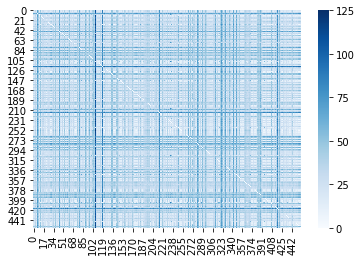

In [83]:
sns.heatmap(mat, cmap='Blues')
plt.show()

In [53]:
from collections import Counter
import pandas as pd

In [84]:
c = Counter(mat.flatten().astype(int))

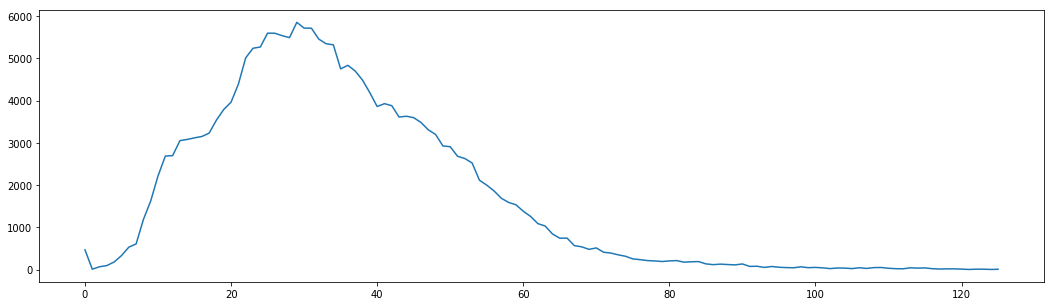

In [85]:
plt.figure(figsize=(18,5))
sns.lineplot(x=list(c.keys()),y=list(c.values()))
plt.show()

### Clustering

In [86]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [100]:
X = StandardScaler().fit_transform(mat)
db = DBSCAN(eps=0.8, min_samples=3).fit(X)

In [104]:
np.unique(db.labels_)

array([-1,  0])

In [101]:
np.where(db.labels_ == 0)

(array([ 59, 122, 139]),)

In [96]:
bo_str[59]

'qc'

In [97]:
bo_str[122]

'qc'

In [103]:
bo_str[139]

'qc'

There is no such thing as a 'Build Order' from this dataset.